In [180]:
from statsmodels.tsa.stattools import adfuller
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Task 1

а). Сгенерировать гауссовский шум со средним значением 0 и дисперсией 1 (нормальное распределение), 500 точек.

In [181]:
gaussian_noise = np.random.normal(0, 1, 500)

б). Построить график.

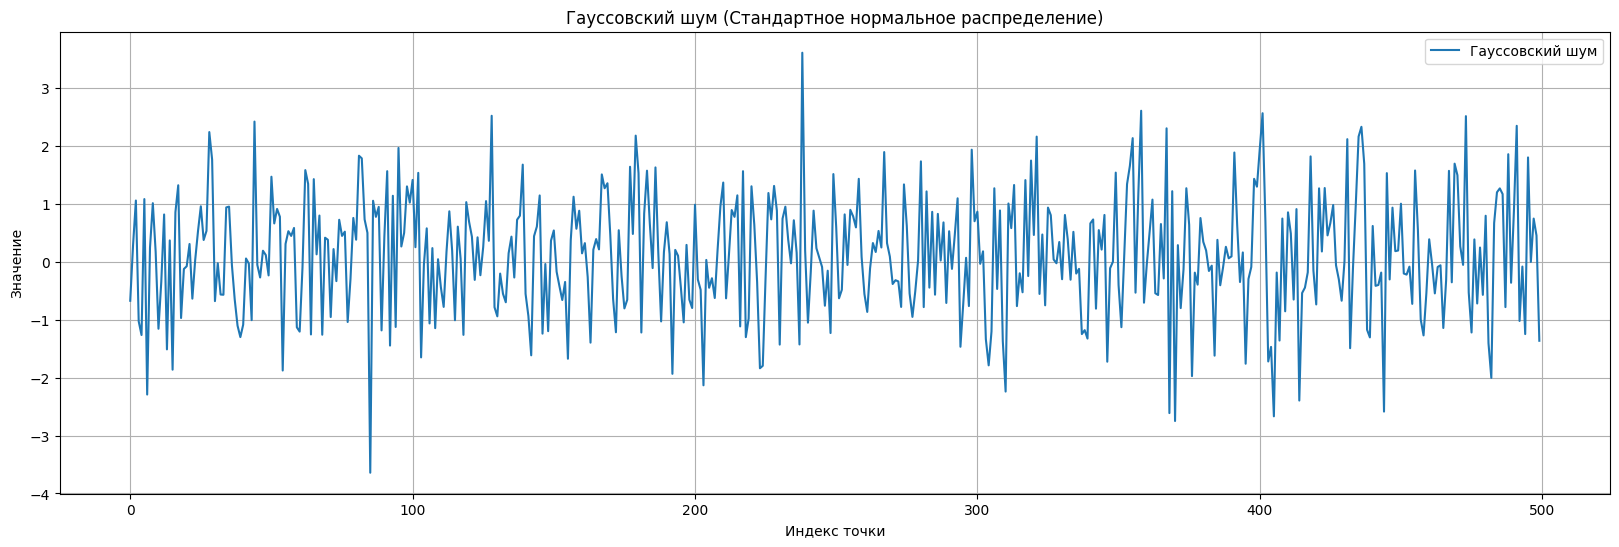

In [182]:
plt.figure(figsize=(20, 6))
plt.plot(gaussian_noise, label='Гауссовский шум')
plt.title('Гауссовский шум (Стандартное нормальное распределение)')
plt.xlabel('Индекс точки')
plt.ylabel('Значение')
plt.legend()
plt.grid(True)
plt.show()

в). Провести тест (односторонний) на стационарность (тест Дики-Фуллера) при уровне значимости α = 0,05 с помощью statsmodels.tsa.stattools.adfuller (p-value – это второе возвращаемое значение).

In [183]:
adfuller_test_result = adfuller(gaussian_noise)

In [184]:
adfuller_test_result

(-13.800070957052752,
 8.604304533138024e-26,
 2,
 497,
 {'1%': -3.4435761493506294,
  '5%': -2.867372960189225,
  '10%': -2.5698767442886696},
 1388.6328452848516)

In [185]:
p_value = adfuller_test_result[1]
print(f'p-value = {p_value:.20f}')

p-value = 0.00000000000000000000


**Вывод:** ряд стационарен, так как p-value < α = 0.05

**Визуализация**

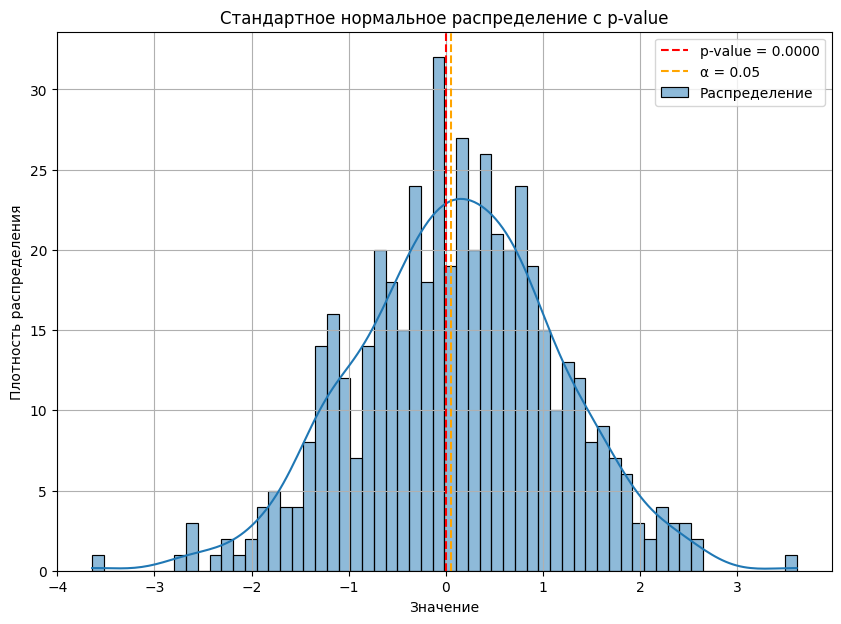

In [186]:
plt.figure(figsize=(10, 7))
sns.histplot(gaussian_noise, bins=60, kde=True, label='Распределение')

plt.axvline(x=p_value, color='r', linestyle='--', label=f'p-value = {p_value:.4f}')
plt.axvline(x=0.05, color='orange', linestyle='--', label=f'α = {0.05}')

plt.title('Стандартное нормальное распределение с p-value')
plt.xlabel('Значение')
plt.ylabel('Плотность распределения')
plt.legend()
plt.grid(True)
plt.show()

## Task 2

а) Добавить к временному ряду из первого задания тренд, равный 0,1x

In [187]:
trend = 0.1 * np.arange(500)
gaussian_noise_with_trend = gaussian_noise + trend

б). Построить график

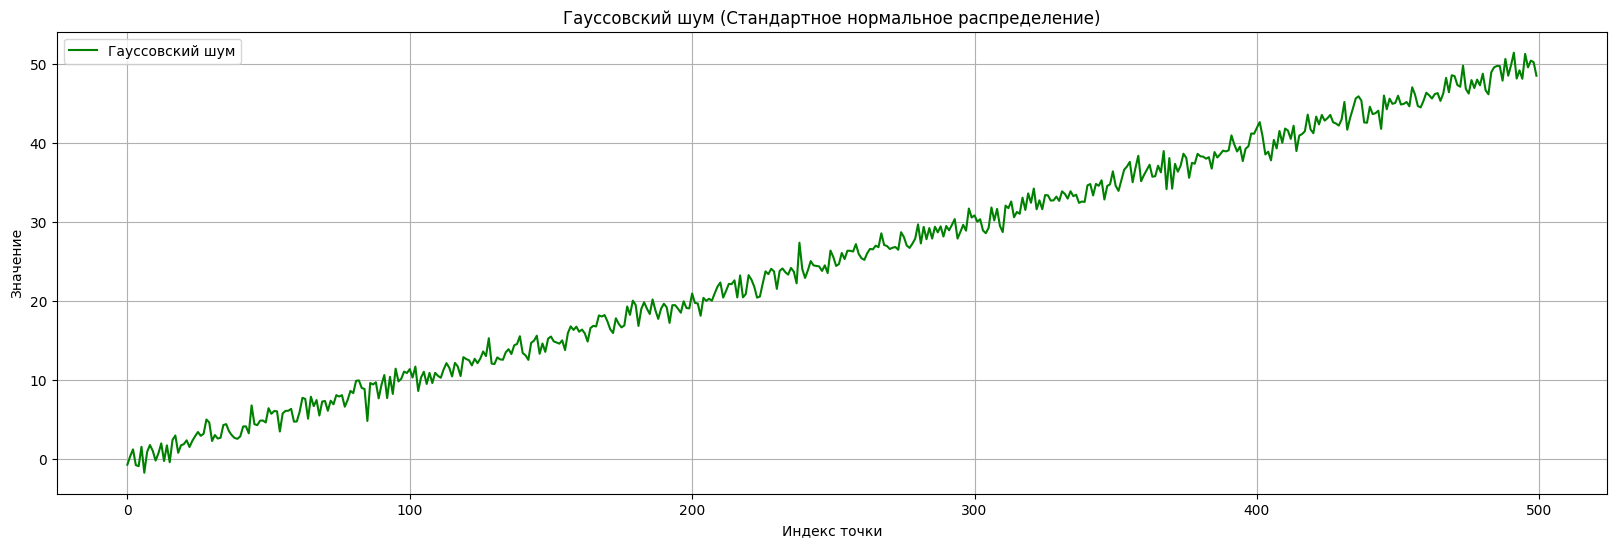

In [188]:
plt.figure(figsize=(20, 6))
plt.plot(gaussian_noise_with_trend, label='Гауссовский шум', color='green')
plt.title('Гауссовский шум (Стандартное нормальное распределение)')
plt.xlabel('Индекс точки')
plt.ylabel('Значение')
plt.legend()
plt.grid(True)
plt.show()

в) Провести DF-тест

In [189]:
adfuller_test_result2 = adfuller(gaussian_noise_with_trend)
adfuller_test_result2

(-0.1409800088185661,
 0.9452006804167132,
 17,
 482,
 {'1%': -3.4439899743408136,
  '5%': -2.8675550551408353,
  '10%': -2.569973792117904},
 1446.4264407638552)

In [190]:
p_value2 = adfuller_test_result2[1]
print(f'p-value with trend = {p_value2:.20f}')

p-value with trend = 0.94520068041671323478


**Вывод:** ряд нестационарен, так как p-value > α = 0.05

**Визуализация**

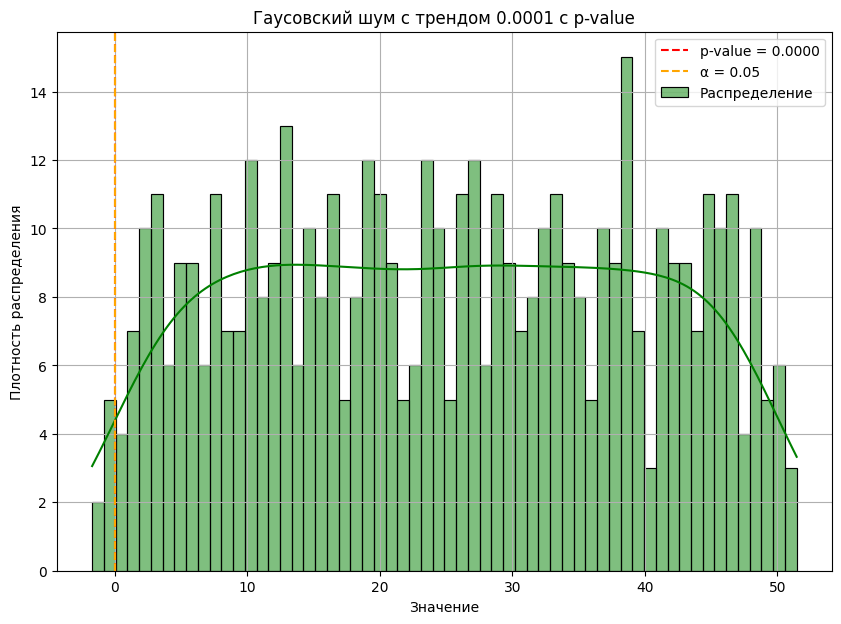

In [191]:
plt.figure(figsize=(10, 7))
sns.histplot(gaussian_noise_with_trend, bins=60, kde=True, label='Распределение', color='g')

plt.axvline(x=p_value, color='r', linestyle='--', label=f'p-value = {p_value:.4f}')
plt.axvline(x=0.05, color='orange', linestyle='--', label=f'α = {0.05}')

plt.title('Гаусовский шум с трендом 0.0001 с p-value')
plt.xlabel('Значение')
plt.ylabel('Плотность распределения')
plt.legend()
plt.grid(True)
plt.show()

## Task 3

In [192]:
data = pd.read_csv('passengers.csv')
data.rename(columns={'#Passengers': 'passengers_count'}, inplace=True)
data['Month'] = pd.to_datetime(data['Month']) 
data.head()

,Month,passengers_count
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121


**Обычный датасет**

In [193]:
df = data.copy()
df.head()

,Month,passengers_count
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121


In [194]:
df_part1 = df.iloc[:49]
df_part2 = df.iloc[49:97]
df_part3 = df.iloc[97:]
df_by_parts = (df_part1, df_part2, df_part3)

In [195]:
print('Статистики по частям датасета\n')
for part_index, part in enumerate(df_by_parts):
    part_mean = part['passengers_count'].mean()
    part_var = part['passengers_count'].var()
    print(f'ЧАСТЬ {part_index + 1}: Среднее = {part_mean:.3f}, Дисперсия = {part_var:.3f}')

Статистики по частям датасета

ЧАСТЬ 1: Среднее = 159.143, Дисперсия = 1100.750
ЧАСТЬ 2: Среднее = 271.521, Дисперсия = 3031.148
ЧАСТЬ 3: Среднее = 415.574, Дисперсия = 6080.641


**DF-тест**

In [196]:
adfuller_test_result_df = adfuller(df['passengers_count'])
adfuller_test_result_df

(0.8153688792060482,
 0.991880243437641,
 13,
 130,
 {'1%': -3.4816817173418295,
  '5%': -2.8840418343195267,
  '10%': -2.578770059171598},
 996.692930839019)

In [197]:
p_value_df = adfuller_test_result_df[1]
print(f'p-value для обычного датасета = {p_value_df:.20f}')

p-value для обычного датасета = 0.99188024343764102930


**DF-тест по частям**

In [198]:
print('DF-тест по частям датасета\n')
for part_index, part in enumerate(df_by_parts):
    adt = adfuller(part['passengers_count'])
    p_value = adt[1]
    print(f'ЧАСТЬ {part_index + 1}: p_value = {p_value:.3f}')

DF-тест по частям датасета

ЧАСТЬ 1: p_value = 0.999
ЧАСТЬ 2: p_value = 0.998
ЧАСТЬ 3: p_value = 0.997


**ВЫВОД**

По статистикам и DF-тесту можно сделать вывод, что ряд нестационарный. Значение p_value в каждой части близко к 1, а дисперсия сильно меняется

**Логарифмированный датасет**

In [199]:
log_df = data.copy()
log_df['passengers_count'] = np.log(log_df['passengers_count'])
log_df.head()

,Month,passengers_count
0,1949-01-01,4.718499
1,1949-02-01,4.770685
2,1949-03-01,4.882802
3,1949-04-01,4.859812
4,1949-05-01,4.795791


In [200]:
log_df_part1 = log_df.iloc[:49]
log_df_part2 = log_df.iloc[49:97]
log_df_part3 = log_df.iloc[97:]
log_df_by_parts = (log_df_part1, log_df_part2, log_df_part3)

In [201]:
print('Статистики по логарифмированным частям датасета\n')
for part_index, part in enumerate(log_df_by_parts):
    part_mean = part['passengers_count'].mean()
    part_var = part['passengers_count'].var()
    print(f'ЧАСТЬ {part_index + 1}: Среднее = {part_mean:.3f}, Дисперсия = {part_var:.3f}')

Статистики по логарифмированным частям датасета

ЧАСТЬ 1: Среднее = 5.049, Дисперсия = 0.043
ЧАСТЬ 2: Среднее = 5.585, Дисперсия = 0.039
ЧАСТЬ 3: Среднее = 6.013, Дисперсия = 0.033


**DF-тест**

In [202]:
adfuller_test_result_log_df = adfuller(log_df['passengers_count'])
adfuller_test_result_log_df

(-1.7170170891069607,
 0.42236677477039125,
 13,
 130,
 {'1%': -3.4816817173418295,
  '5%': -2.8840418343195267,
  '10%': -2.578770059171598},
 -445.3990312497209)

In [203]:
p_value_log_df = adfuller_test_result_log_df[1]
print(f'p-value для логарифмированного датасета = {p_value_log_df:.20f}')

p-value для логарифмированного датасета = 0.42236677477039125117


**DF-тест по частям**

In [204]:
print('DF-тест по частям логарифмированного датасета\n')
for part_index, part in enumerate(log_df_by_parts):
    adt = adfuller(part['passengers_count'])
    p_value = adt[1]
    print(f'ЧАСТЬ {part_index + 1}: p_value = {p_value:.3f}')

DF-тест по частям логарифмированного датасета

ЧАСТЬ 1: p_value = 0.994
ЧАСТЬ 2: p_value = 0.995
ЧАСТЬ 3: p_value = 0.995


**ВЫВОД**

DF-тест на всей выборке показывает, что ряд стационарный, статистики по каждой части говорят о том же. Хотя p_value на каждой части близки к 1